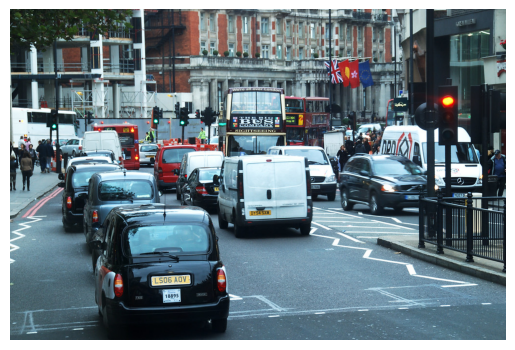

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path="/content/3288366362_21533748a6_b.jpg"
bgr_img=cv2.imread(img_path)
rgb_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis("off")
plt.show()

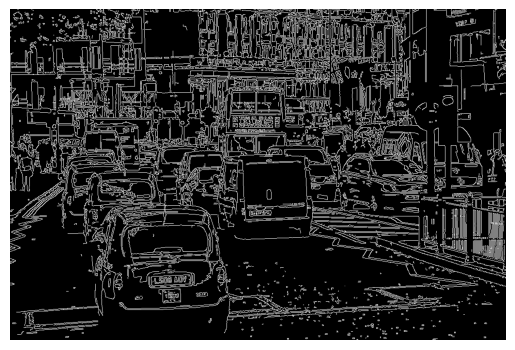

In [15]:
#Canny
gray_img=cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_img, 100, 200)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

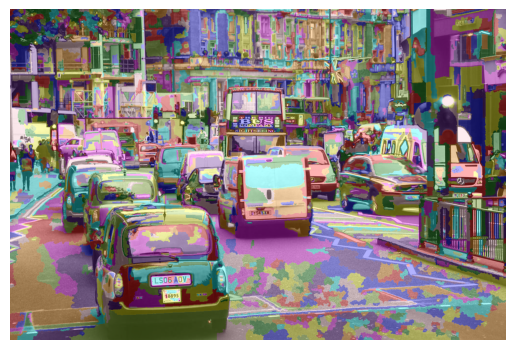

In [24]:
#Watershed
from skimage.feature import canny
from skimage.measure import label
from skimage.segmentation import watershed
from skimage.color import label2rgb
edges=canny(gray_img)
markers=label(edges)
segmented=watershed(gray_img, markers, mask=gray_img)
plt.imshow(label2rgb(segmented, image=rgb_img))
plt.axis('off')
plt.show()

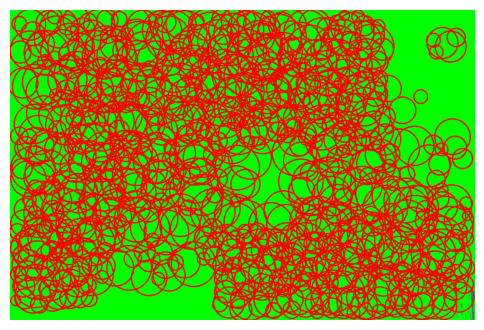

In [31]:
#Hough
edges = cv2.Canny(gray_img, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
if lines is not None:
  for rho, theta in lines[:, 0]:
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a * rho, b * rho
    x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
    x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
    cv2.line(bgr_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=50)
if circles is not None:
  circles = np.uint16(np.around(circles))
  for i in circles[0, :]:
    cv2.circle(bgr_img, (i[0], i[1]), i[2], (0, 0, 255), 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-2-19 Python-3.11.11 torch-2.5.1+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 133MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


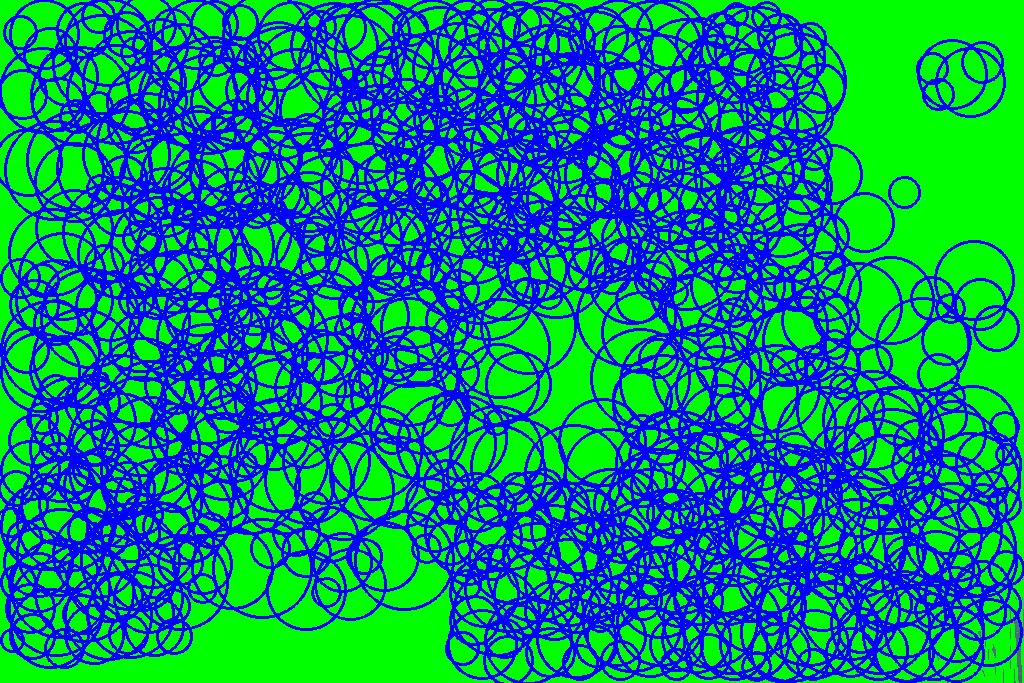

In [36]:
#YOLO
import torch
import torchvision.transforms as transforms
import torchvision.models as models
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
results=model(rgb_img)
results.show()

In [37]:
import torch
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
transform = transforms.Compose([
        transforms.ToTensor(),
    ])
image_tensor = transform(rgb_img).unsqueeze(0)
with torch.no_grad():
  outputs = model(image_tensor)
boxes = outputs[0]['boxes'].cpu().numpy()
scores = outputs[0]['scores'].cpu().numpy()
for i, box in enumerate(boxes):
  if scores[i] > 0.5:
    cv2.rectangle(bgr_img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 145MB/s]
